Name: Sangam Dumre

UNI ID: 2332239


In [ ]:
Step 1: Set Up and Import Libraries

In [ ]:
# !pip install tensorflow pillow matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image


Step 2: Mount Google Drive and Set Dataset Paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/MyDrive/Colab Notebooks/DevanagariHandwrittenDigitDataset/Train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/DevanagariHandwrittenDigitDataset/Test'

# Image dimensions
img_height, img_width = 28, 28


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Step 3: Load and Preprocess the Dataset

In [ ]:
# Function to load images and labels from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}  # e.g., {"digit_0": 0, ..., "digit_9": 9}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            img = Image.open(img_path).convert("L")  # Grayscale
            img = img.resize((img_width, img_height))
            img = np.array(img) / 255.0  # Normalize
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load the images
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape for Keras (samples, height, width, channels)
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Confirm shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (17040, 28, 28, 1), y_train shape: (17040, 10)
x_test shape: (3049, 28, 28, 1), y_test shape: (3049, 10)


Step 4: Visualize Sample Images

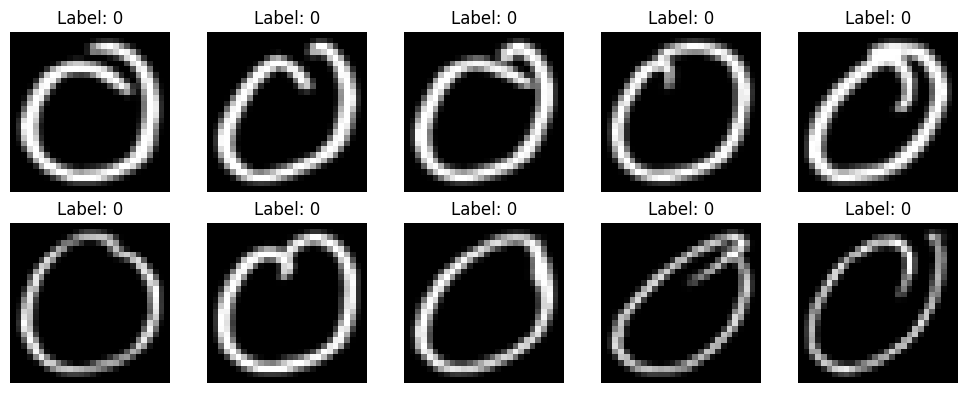

In [ ]:
# Show first 10 training images with labels
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Step 5: Build the Fully Connected Neural Network (FCN)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

# Define the model architecture
model = Sequential([
    Input(shape=(28, 28, 1)),         # Input layer
    Flatten(),                        # Flatten image to 1D
    Dense(64, activation="sigmoid"), # 1st hidden layer
    Dense(128, activation="sigmoid"),# 2nd hidden layer
    Dense(256, activation="sigmoid"),# 3rd hidden layer
    Dense(10, activation="softmax")  # Output layer for 10 classes
])

# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Step 6: Compile the Model

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',                     # Optimizer
    loss='categorical_crossentropy',      # Loss function for one-hot labels
    metrics=['accuracy']                  # Track accuracy
)

 Step 7: Train the Model with Callbacks and Validation Split

In [ ]:
# Training parameters
batch_size = 128
epochs = 20

# Callbacks: Save best model and stop early if overfitting
callbacks = [
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,  # Use 20% of training data as validation
    callbacks=callbacks
)

Epoch 1/20
103/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2774 - loss: 1.9612

107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2867 - loss: 1.9445 - val_accuracy: 0.0023 - val_loss: 7.1303
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8164 - loss: 0.6208 - val_accuracy: 0.0023 - val_loss: 8.4308
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9213 - loss: 0.2912 - val_accuracy: 0.0023 - val_loss: 9.1723
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9480 - loss: 0.1896 - val_accuracy: 0.0023 - val_loss: 9.7743


Step 8: Visualize Training and Validation Performance

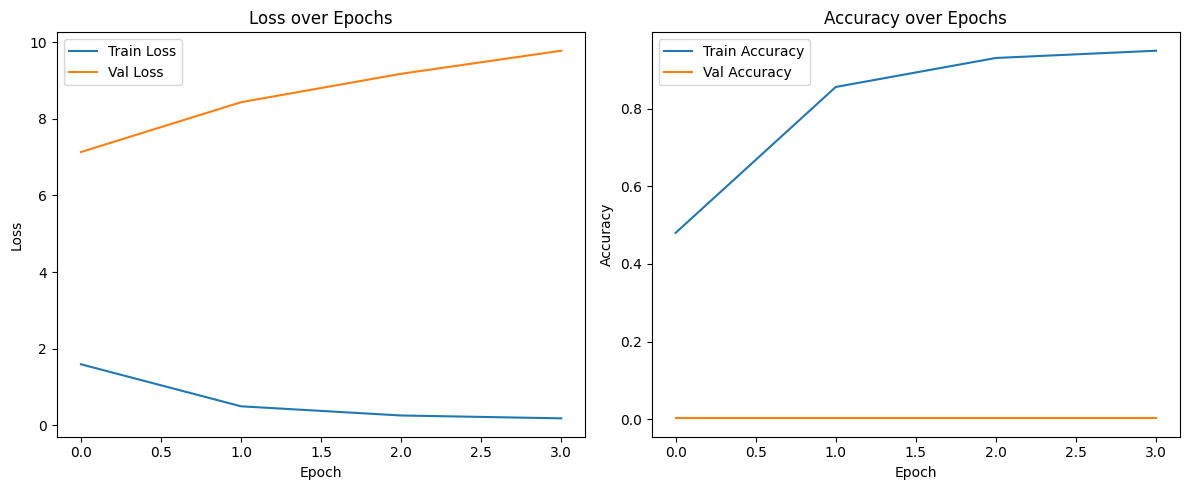

In [ ]:
# Plot training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label="Train Accuracy")
plt.plot(val_acc, label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

Step 9: Evaluate the Model on the Test Set

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

96/96 - 1s - 5ms/step - accuracy: 0.6333 - loss: 2.0966
Test accuracy: 0.6333


Step 10: Save and Load the Model

In [ ]:
# Save the model
model.save("devnagari_fcn_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model("devnagari_fcn_model.h5")

# Re-evaluate the loaded model
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Loaded model test accuracy: {acc:.4f}")

96/96 - 1s - 6ms/step - accuracy: 0.6333 - loss: 2.0966
Loaded model test accuracy: 0.6333


 Step 11: Make Predictions

In [ ]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Print the first 5 predictions vs true labels
for i in range(5):
    print(f"Image {i+1}: Predicted = {predicted_labels[i]}, True = {true_labels[i]}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Image 1: Predicted = 0, True = 0
Image 2: Predicted = 0, True = 0
Image 3: Predicted = 0, True = 0
Image 4: Predicted = 0, True = 0
Image 5: Predicted = 0, True = 0


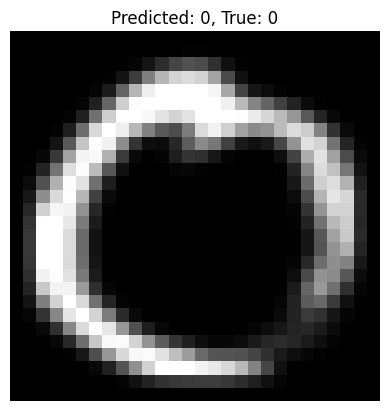

In [ ]:
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_labels[0]}, True: {true_labels[0]}")
plt.axis("off")
plt.show()